Importing dataset

In [39]:
import numpy as np
import pandas as pd

df = pd.read_csv('C:/Users/cse32/Desktop/sample.csv')
df.head()

,ge,cst,tnp,twp,iap,esp,arr,ms,ls,as,...,fq,mq,fo,mo,nf,sh,ss,me,tt,atd
0,F,G,Good,Good,Vg,Good,Y,Unmarried,V,Paid,...,Um,10,Farmer,Housewife,Large,Poor,Govt,Asm,Small,Good
1,M,OBC,Vg,Vg,Vg,Vg,N,Unmarried,V,Paid,...,Um,Il,Service,Service,Small,Poor,Govt,Asm,Average,Average
2,F,OBC,Good,Good,Vg,Good,N,Unmarried,V,Paid,...,12,10,Service,Housewife,Average,Average,Govt,Asm,Large,Good
3,M,MOBC,Pass,Good,Vg,Good,N,Unmarried,V,Paid,...,12,Um,Business,Business,Large,Poor,Govt,Asm,Average,Average
4,M,G,Good,Good,Vg,Vg,N,Unmarried,V,Paid,...,10,12,Service,Housewife,Large,Poor,Private,Asm,Small,Good


### Basic Description of Dataset
shape attribute shows the number of rows and column in the dataset

In [26]:
df.shape

(131, 22)

Attribute names and their data types. Here all the attributes are of type 'object'. Which implies they are categorical data.

In [28]:
df.dtypes

ge     object
cst    object
tnp    object
twp    object
iap    object
esp    object
arr    object
ms     object
ls     object
as     object
fmi    object
fs     object
fq     object
mq     object
fo     object
mo     object
nf     object
sh     object
ss     object
me     object
tt     object
atd    object
dtype: object

The summary of the dataset (for every attribute, it shows count and number of unique values)

In [31]:
df.describe()

,ge,cst,tnp,twp,iap,esp,arr,ms,ls,as,...,fq,mq,fo,mo,nf,sh,ss,me,tt,atd
count,131,131,131,131,131,131,131,131,131,131,...,131,131,131,131,131,131,131,131,131,131
unique,2,5,4,4,4,4,2,1,2,2,...,6,6,5,5,3,3,2,4,3,3
top,M,OBC,Good,Good,Vg,Good,N,Unmarried,V,Paid,...,Um,Um,Service,Housewife,Large,Average,Govt,Eng,Small,Good
freq,72,57,59,65,63,54,78,131,92,76,...,40,52,38,115,58,59,91,62,78,56


To check whether the dataset has missing values. 

In [33]:
df.isnull().sum()

ge     0
cst    0
tnp    0
twp    0
iap    0
esp    0
arr    0
ms     0
ls     0
as     0
fmi    0
fs     0
fq     0
mq     0
fo     0
mo     0
nf     0
sh     0
ss     0
me     0
tt     0
atd    0
dtype: int64

### Visulaization of Data
The distribution of values for the attribute 'ESP'

Good    54
Vg      42
Pass    27
Best     8
Name: esp, dtype: int64


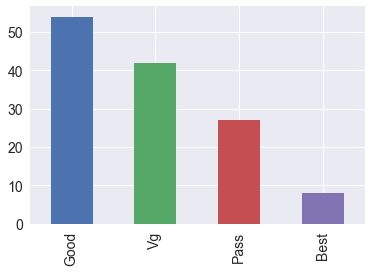

In [117]:
print(pd.value_counts(df['esp']))
pd.value_counts(df['esp']).plot(kind="bar")

To determine the gender distribution under different classes of target attribute (ESP)
* Overall, for most categories of ESP, male and female have equally scored
* Under 'PASS' category, more males han femals are present
* We can say that gender is equally distributed with respect to ESP

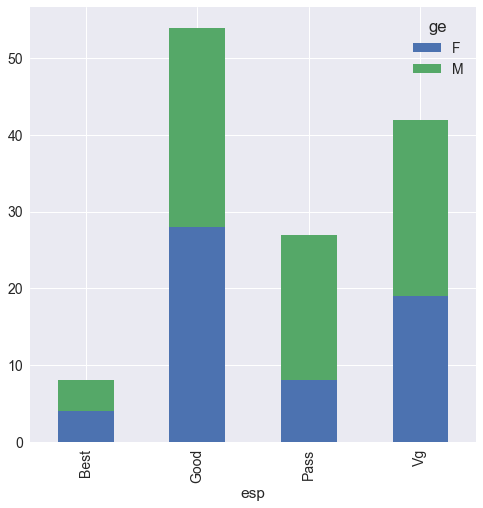

In [128]:
clarity_color_table = pd.crosstab(index=df["esp"], columns=df["ge"])
clarity_color_table.plot(kind="bar", figsize=(8,8),stacked=True)

To identify correlation between the attributes is not possible because the datatype is categorical. One possible way is to convert the dataset to numerical (by label encoding) and testing for correlation.

### Predict End Semester Percentage based on various social, economic and academic attributes

The unique values of target attribute (ESP)

In [69]:
df['esp'].unique()

array(['Good', 'Vg', 'Best', 'Pass'], dtype=object)

Define function for label encoding categorical data to numerical data

In [70]:
def label_encode(data):
    global df
    df_new = pd.DataFrame()
    from sklearn import preprocessing
    for feature in df.columns:
        le = preprocessing.LabelEncoder()
        le.fit(df[feature].unique())
        df_new[feature] = le.transform(data[feature]) 
    return df_new

def label_decode(data):
    global df
    df_new = pd.DataFrame()
    for feature in df.columns:
        le = preprocessing.LabelEncoder()
        le.fit(df[feature].unique())
        df_new[feature] = le.inverse_transform(data[feature])
    return df_new


Encode dataframe

In [66]:
#Preprocessed Dataframe
pp_df = label_encode(data)
pp_df.head()

,ge,cst,tnp,twp,iap,esp,arr,ms,ls,as,...,fq,mq,fo,mo,nf,sh,ss,me,tt,atd
0,0,0,1,1,3,1,1,0,1,1,...,5,0,1,1,1,2,0,0,2,1
1,1,2,3,3,3,3,0,0,1,1,...,5,3,4,4,2,2,0,0,0,0
2,0,2,1,1,3,1,0,0,1,1,...,1,0,4,1,0,0,0,0,1,1
3,1,1,2,1,3,1,0,0,1,1,...,1,5,0,0,1,2,0,0,0,0
4,1,0,1,1,3,3,0,0,1,1,...,0,1,4,1,1,2,1,0,2,1


Split the dataset for training and testing (70:30 ratio)

In [102]:
from sklearn.model_selection import train_test_split
import numpy as np

Y = pp_df['esp'].values
X = pp_df.drop(['esp'],axis = 1).values

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.30, random_state = 20)

print('Training rows:', X_train.shape[0])
print('Testing rows:', X_test.shape[0])

Training rows: 91
Testing rows: 40


Fit the model using DecisionTreeClassifier

In [103]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)

clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Predict for test data and print accuracy score

In [106]:
from sklearn.metrics import accuracy_score

predicted = clf.predict(X_test)
print('Accuracy = ',accuracy_score(Y_test, predicted))

Accuracy =  0.675


Display the confusion matrix

Confusion Matrix:
[[ 1  0  0  1]
 [ 0 13  2  1]
 [ 1  2  4  0]
 [ 1  5  0  9]]


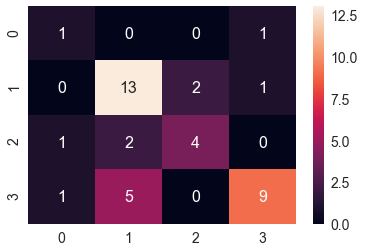

In [110]:
from sklearn.metrics import confusion_matrix
import seaborn as sn #To produce a heat map for confusion matrix
import matplotlib.pyplot as plt

print('Confusion Matrix:')
cm = confusion_matrix(Y_test, predicted)
print(cm)
df_cm = pd.DataFrame(cm)
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})